

### Theoretical Questions with Answers

#### **1. What is Logistic Regression, and how does it differ from Linear Regression?**

**Logistic Regression** is a classification algorithm used to predict the probability of a categorical dependent variable. It is mainly used for binary classification (0 or 1, Yes or No).

- **Linear Regression** predicts continuous outcomes.
- **Logistic Regression** predicts probabilities that are then mapped to binary outcomes using the **sigmoid function**.

---

#### **2. What is the mathematical equation of Logistic Regression?**

The equation is:

\[
P(y = 1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n)}}
\]

Where:
- \( P(y = 1|x) \) is the probability of the class being 1
- \( \beta_0 \) is the intercept
- \( \beta_1 \ldots \beta_n \) are the coefficients

---

#### **3. Why do we use the Sigmoid function in Logistic Regression?**

The **Sigmoid function** maps any real-valued number into the (0, 1) interval, making it ideal for modeling probabilities:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

It allows us to interpret the output as a probability.

---

#### **4. What is the cost function of Logistic Regression?**

The cost function used is the **Log Loss** (binary cross-entropy):

\[
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right]
\]

This penalizes incorrect predictions with higher cost.

---

#### **5. What is Regularization in Logistic Regression? Why is it needed?**

**Regularization** adds a penalty to the cost function to reduce model complexity and prevent **overfitting**.

Types:
- **L1 (Lasso)**: Shrinks some coefficients to zero (feature selection)
- **L2 (Ridge)**: Shrinks coefficients towards zero but keeps all features

---

#### **6. Explain the difference between Lasso, Ridge, and Elastic Net regression**

- **Lasso (L1)**: Adds \( \lambda \sum |\theta_j| \) to cost. Encourages sparsity.
- **Ridge (L2)**: Adds \( \lambda \sum \theta_j^2 \) to cost. Encourages small weights.
- **Elastic Net**: Combines L1 and L2: \( \lambda_1 \sum |\theta_j| + \lambda_2 \sum \theta_j^2 \)

---

#### **7. When should we use Elastic Net instead of Lasso or Ridge?**

Use **Elastic Net** when:
- You have many correlated features
- You want both feature selection (L1) and stability (L2)

---

#### **8. What is the impact of the regularization parameter (λ) in Logistic Regression?**

- **High λ**: Stronger penalty, simpler model, risk of underfitting
- **Low λ**: Weaker penalty, more complex model, risk of overfitting

---

#### **9. What are the key assumptions of Logistic Regression?**

1. No multicollinearity
2. Linearity of log-odds with independent variables
3. Independent observations
4. Large sample size for stable estimates

---

#### **10. What are some alternatives to Logistic Regression for classification tasks?**

- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- Naive Bayes
- K-Nearest Neighbors (KNN)
- Neural Networks

---

#### **11. What are Classification Evaluation Metrics?**

- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**
- **ROC-AUC**
- **Confusion Matrix**
- **Cohen’s Kappa**
- **MCC (Matthews Correlation Coefficient)**

---

#### **12. How does class imbalance affect Logistic Regression?**

Class imbalance can lead to a model biased towards the majority class. Solutions include:
- Using **class weights**
- **Oversampling** / **Undersampling**
- **Synthetic Data Generation (SMOTE)**

---

#### **13. What is Hyperparameter Tuning in Logistic Regression?**

It’s the process of finding the best combination of hyperparameters (e.g., **C**, **penalty**, **solver**) using techniques like **GridSearchCV** or **RandomizedSearchCV**.

---

#### **14. What are different solvers in Logistic Regression? Which one should be used?**

- **liblinear**: good for small datasets
- **saga**: supports L1, L2, elasticnet; works with large datasets
- **lbfgs**: good for L2 regularization and multiclass
- **newton-cg**: good for multiclass but no L1

---

#### **15. How is Logistic Regression extended for multiclass classification?**

1. **One-vs-Rest (OvR)**: Train one classifier per class
2. **Softmax (Multinomial)**: Generalizes logistic regression to multiple classes

---

#### **16. What are the advantages and disadvantages of Logistic Regression?**

**Advantages:**
- Simple, interpretable
- Works well for linearly separable classes

**Disadvantages:**
- Poor with non-linear relationships
- Sensitive to multicollinearity and outliers

---

#### **17. What are some use cases of Logistic Regression?**

- Email spam detection
- Credit scoring
- Disease diagnosis (e.g., diabetes prediction)
- Customer churn prediction
- Marketing response prediction

---

#### **18. What is the difference between Softmax Regression and Logistic Regression?**

- **Logistic Regression**: Binary classification using sigmoid
- **Softmax Regression**: Multiclass classification using softmax function

---

#### **19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?**

- Use **OvR** for simplicity or when interpretability is key
- Use **Softmax** for performance and when classes are mutually exclusive

---

#### **20. How do we interpret coefficients in Logistic Regression?**

Each coefficient represents the change in the **log-odds** of the outcome for a one-unit increase in the corresponding predictor.

\[
\text{Odds Ratio} = e^{\beta_j}
\]


In [2]:
# Q1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))



Model Accuracy: 0.956140350877193


In [3]:
# Q2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("L1-Regularized Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


L1-Regularized Logistic Regression Accuracy: 0.956140350877193


In [4]:
# Q3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("L2-Regularized Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Model Coefficients:", model.coef_)


L2-Regularized Logistic Regression Accuracy: 0.956140350877193
Model Coefficients: [[ 2.13248406e+00  1.52771940e-01 -1.45091255e-01 -8.28669349e-04
  -1.42636015e-01 -4.15568847e-01 -6.51940282e-01 -3.44456106e-01
  -2.07613380e-01 -2.97739324e-02 -5.00338038e-02  1.44298427e+00
  -3.03857384e-01 -7.25692126e-02 -1.61591524e-02 -1.90655332e-03
  -4.48855442e-02 -3.77188737e-02 -4.17516190e-02  5.61347410e-03
   1.23214996e+00 -4.04581097e-01 -3.62091502e-02 -2.70867580e-02
  -2.62630530e-01 -1.20898539e+00 -1.61796947e+00 -6.15250835e-01
  -7.42763610e-01 -1.16960181e-01]]


In [5]:
# Q4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Elastic Net Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Elastic Net Logistic Regression Accuracy: 0.9649122807017544


In [11]:
# Q5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [12]:
# Q6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 1.0


In [13]:
# Q7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

data = load_iris()
X = data.data
y = data.target

model = LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=5)

scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.9733333333333334


In [14]:
# Q8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('your_dataset.csv')  # Replace with actual CSV file
X = data.drop('target', axis=1)         # Replace 'target' with actual column name
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [15]:
#  9: Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
param_dist = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'C': np.float64(1.8888597006477972), 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9604395604395604


In [16]:
# 10: Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("OvO Accuracy:", accuracy)

OvO Accuracy: 1.0


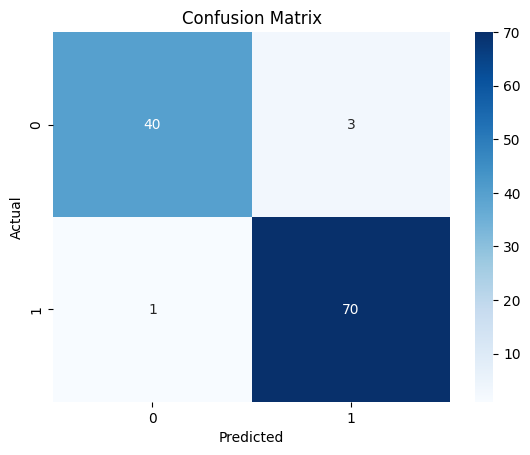

In [33]:
# 11: Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# 12: Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


In [35]:
# 13: Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       180
           1       0.41      0.75      0.53        20

    accuracy                           0.86       200
   macro avg       0.69      0.81      0.72       200
weighted avg       0.91      0.86      0.88       200



In [37]:
# 14: Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load Titanic dataset from online source
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)

# Select features and target
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']

# Define preprocessing
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7528089887640449


In [38]:
# 15 15: Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
model_no_scale = LogisticRegression(max_iter=1000)
model_no_scale.fit(X_train, y_train)
y_pred_no_scale = model_no_scale.predict(X_test)
acc_no_scale = accuracy_score(y_test, y_pred_no_scale)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without scaling:", acc_no_scale)
print("Accuracy with scaling:", acc_scaled)

Accuracy without scaling: 0.956140350877193
Accuracy with scaling: 0.9736842105263158


In [39]:
# 16: Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9970520799213888


In [40]:
# 17: Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with C=0.5:", accuracy)

Accuracy with C=0.5: 0.956140350877193


In [41]:
# 18: Write a Python program to train Logistic Regression and identify important features based on model coefficients
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Top 5 Important Features:")
print(coefficients.head(5))

Top 5 Important Features:
            Feature  Coefficient
0       mean radius     2.159021
20     worst radius     1.268334
11    texture error     0.903038
12  perimeter error     0.268826
1      mean texture     0.114013


In [42]:
# 19: Write a Python program to train Logistic Regression and evaluate its performance using Cohen's Kappa Score.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa)

Cohen's Kappa Score: 0.9246280991735537


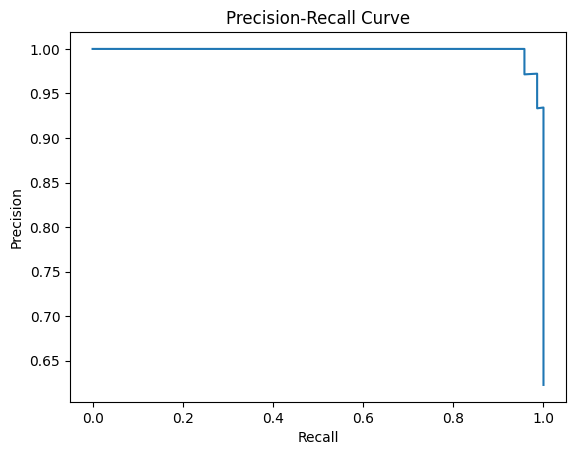

In [43]:
# 20: Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [44]:
#  21: Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {solver}:", acc)

Accuracy with liblinear: 0.956140350877193
Accuracy with saga: 0.9649122807017544
Accuracy with lbfgs: 0.956140350877193


In [45]:
# 22: Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.9252853920667758


In [46]:
# 23: Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Raw data
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

# Standardized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy (raw data):", acc_raw)
print("Accuracy (scaled data):", acc_scaled)

Accuracy (raw data): 0.956140350877193
Accuracy (scaled data): 0.9736842105263158


In [47]:
# 24: Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegressionCV(Cs=10, cv=5, max_iter=1000)
model.fit(X_train, y_train)

print("Optimal C:", model.C_[0])
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Optimal C: 1291.5496650148827
Accuracy: 0.9824561403508771


In [48]:
# 25: Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from joblib import dump, load

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save model
dump(model, 'logreg_model.joblib')

# Load model
loaded_model = load('logreg_model.joblib')

# Make predictions
y_pred = loaded_model.predict(X_test[:5])
print("Sample predictions:", y_pred)

Sample predictions: [1 0 0 1 1]
